<a href="https://colab.research.google.com/github/pakvadim151/Netology/blob/main/Homework_stat_basics_VadimPak_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', na_values='?', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [4]:
df1 = df.iloc[:, :8]

In [5]:
df1.columns = ['surgery?', 'Age', 'Hospital_Number', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_extremities', 'peripheral_pulse']
df1.head(10)
                  

,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_extremities,peripheral_pulse
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN
5,2.0,1,528355,NaN,NaN,NaN,2.0,1.0
6,1.0,1,526802,37.9,48.0,16.0,1.0,1.0
7,1.0,1,529607,NaN,60.0,NaN,3.0,NaN
8,2.0,1,530051,NaN,80.0,36.0,3.0,4.0
9,2.0,9,5299629,38.3,90.0,NaN,1.0,NaN


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery?                 299 non-null    float64
 1   Age                      300 non-null    int64  
 2   Hospital_Number          300 non-null    int64  
 3   rectal_temperature       240 non-null    float64
 4   pulse                    276 non-null    float64
 5   respiratory_rate         242 non-null    float64
 6   temperature_extremities  244 non-null    float64
 7   peripheral_pulse         231 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


In [7]:
df1['surgery?'].value_counts()

1.0    180
2.0    119
Name: surgery?, dtype: int64

In [8]:
df1['Age'].value_counts()

1    276
9     24
Name: Age, dtype: int64

In [9]:
df1['Hospital_Number'].value_counts()

532349     2
528151     2
5279822    2
528469     2
529424     2
          ..
533696     1
5297379    1
533736     1
534963     1
534618     1
Name: Hospital_Number, Length: 284, dtype: int64

In [10]:
df1['rectal_temperature'].value_counts()

38.0    26
38.5    19
38.3    18
37.8    17
38.2    16
38.1    12
37.5    12
38.6    12
38.4    11
37.9     7
37.2     7
37.6     7
37.7     7
38.7     7
37.3     6
38.8     6
39.2     5
39.5     4
39.3     4
38.9     4
39.0     4
39.4     3
37.1     3
37.4     3
40.3     2
37.0     2
39.1     2
36.5     2
36.9     1
40.8     1
36.6     1
36.1     1
35.4     1
36.0     1
36.8     1
39.6     1
39.9     1
36.4     1
39.7     1
40.0     1
Name: rectal_temperature, dtype: int64

In [11]:
df1['pulse'].value_counts()

48.0     28
60.0     25
40.0     18
52.0     12
88.0     12
44.0     11
100.0    11
72.0     11
120.0    10
42.0     10
64.0      8
96.0      8
84.0      8
80.0      8
54.0      7
56.0      7
50.0      6
66.0      6
104.0     5
68.0      5
92.0      4
70.0      4
76.0      4
108.0     3
86.0      3
78.0      3
90.0      3
36.0      3
112.0     3
114.0     2
45.0      2
140.0     2
124.0     2
150.0     2
130.0     2
30.0      2
132.0     1
129.0     1
184.0     1
75.0      1
65.0      1
164.0     1
136.0     1
49.0      1
98.0      1
38.0      1
160.0     1
46.0      1
128.0     1
146.0     1
110.0     1
82.0      1
Name: pulse, dtype: int64

In [12]:
df1['temperature_extremities'].value_counts()

3.0    109
1.0     78
2.0     30
4.0     27
Name: temperature_extremities, dtype: int64

In [13]:
df1['peripheral_pulse'].value_counts()

1.0    115
3.0    103
4.0      8
2.0      5
Name: peripheral_pulse, dtype: int64

In [14]:
print('Max_rectal_temperature = ', max(df1['rectal_temperature']))
print('Max_pulse = ', np.max(df1['pulse']))
print('Max_respiratory_rate = ',df1['respiratory_rate'].max())


Max_rectal_temperature =  40.8
Max_pulse =  184.0
Max_respiratory_rate =  96.0


In [15]:
print('Min_rectal_temperature = ', min(df1['rectal_temperature']))
print('Min_pulse = ', np.min(df1['pulse']))
print('Min_respiratory_rate = ',df1['respiratory_rate'].min())

Min_rectal_temperature =  35.4
Min_pulse =  30.0
Min_respiratory_rate =  8.0


In [16]:
rectal_temperature_range = df1['rectal_temperature'].max() - df1['rectal_temperature'].min()
print('rectal_temperature_range = ', rectal_temperature_range)
pulse_range = df1['pulse'].max() - df1['pulse'].min()
print('pulse_range = ', pulse_range)
respiratory_rate_range = df1['respiratory_rate'].max() - df1['respiratory_rate'].min()
print('respiratory_rate_range = ', respiratory_rate_range)

rectal_temperature_range =  5.399999999999999
pulse_range =  154.0
respiratory_rate_range =  88.0


#Среднеарифметическое

In [17]:
print('rectal_temperature_mean = ', np.mean(df1['rectal_temperature']))
print('pulse_mean = ', df1['pulse'].mean())
print('respiratory_rate_mean = ', df1['respiratory_rate'].mean())

rectal_temperature_mean =  38.16791666666667
pulse_mean =  71.91304347826087
respiratory_rate_mean =  30.417355371900825


#Мода

In [18]:
print ('rectal_temperature_mode = ', df1['rectal_temperature'].mode()[0])
print('pulse_mode = ', df1['pulse'].mode()[0])
print('respiratory_rate_mode = ', df1['respiratory_rate'].mode()[0])

rectal_temperature_mode =  38.0
pulse_mode =  48.0
respiratory_rate_mode =  20.0


#Медиана

In [19]:
print('rectal_temperature_median = ', df1['rectal_temperature'].median())
print('pulse_median = ', df1['pulse'].median())
print('respiratory_rate_mode = ', df1['respiratory_rate'].median())


rectal_temperature_median =  38.2
pulse_median =  64.0
respiratory_rate_mode =  24.5


#СКО

In [20]:
print('rectal_temperature_std =', df1['rectal_temperature'].std())
print('pulse_std = ', np.std(df1['pulse'], ddof=1))
print('respiratory_rate_std = ', df1['respiratory_rate'].std())

rectal_temperature_std = 0.7322886641121578
pulse_std =  28.630556660735
respiratory_rate_std =  17.64223138513467


#Дисперсия

In [21]:
print('rectal_temperature_var =', df1['rectal_temperature'].var())
print('pulse_var = ', np.var(df1['pulse'], ddof=1))
print('respiratory_rate_var = ', df1['respiratory_rate'].var())

rectal_temperature_var = 0.5362466875871686
pulse_var =  819.7087747035573
respiratory_rate_var =  311.2483282466308


Квантили

In [22]:
print('rectal_temperature_quantile ', df1['rectal_temperature'].quantile([0.25, 0.5, 0.75]))
print('pulse_quantile ', df1['pulse'].quantile([0.25, 0.5, 0.75]))
print('respiratory_rate_quantile ', df1['rectal_temperature'].quantile([0.25, 0.5, 0.75]))

rectal_temperature_quantile  0.25    37.8
0.50    38.2
0.75    38.5
Name: rectal_temperature, dtype: float64
pulse_quantile  0.25    48.0
0.50    64.0
0.75    88.0
Name: pulse, dtype: float64
respiratory_rate_quantile  0.25    37.8
0.50    38.2
0.75    38.5
Name: rectal_temperature, dtype: float64


In [23]:
# межквартильный размах
rectal_temperature_IQR = df1['rectal_temperature'].quantile(0.75) - df1['rectal_temperature'].quantile(0.25)
print('rectal_temperature_IQR=', rectal_temperature_IQR)
pulse_IQR = df1['pulse'].quantile(0.75) - df1['pulse'].quantile(0.25)
print('pulse_IQR= ', pulse_IQR)
respiratory_rate_IQR = df1['respiratory_rate'].quantile(0.75) - df1['respiratory_rate'].quantile(0.25)
print('respiratory_rate_IQR= ', respiratory_rate_IQR )

rectal_temperature_IQR= 0.7000000000000028
pulse_IQR=  40.0
respiratory_rate_IQR=  17.5


In [24]:
df1.describe()

,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_extremities,peripheral_pulse
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000


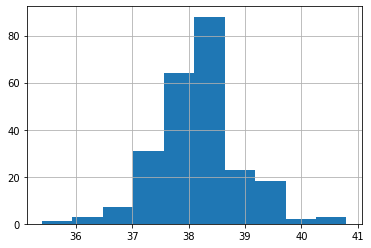

In [25]:
df1.rectal_temperature.hist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


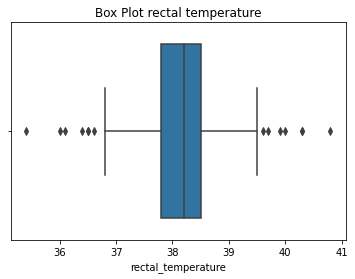

In [26]:
sns.boxplot(df1['rectal_temperature'])
plt.title("Box Plot rectal temperature")
plt.show() 

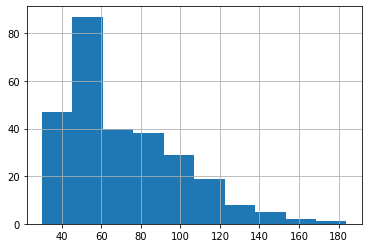

In [27]:
df1.pulse.hist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


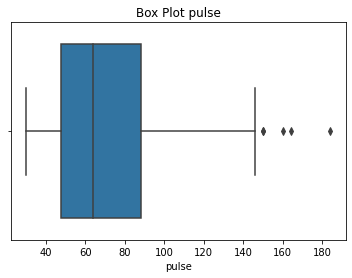

In [28]:
sns.boxplot(df1['pulse'])
plt.title("Box Plot pulse")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


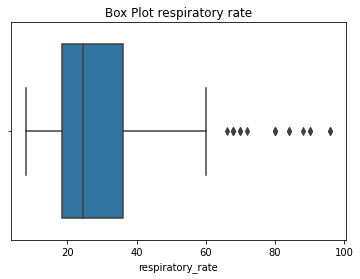

In [29]:
sns.boxplot(df1['respiratory_rate'])
plt.title("Box Plot respiratory rate")
plt.show()

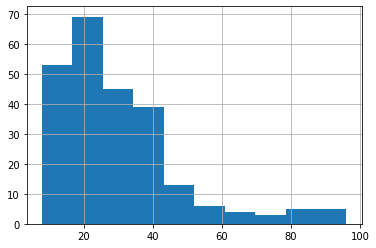

In [30]:
df1.respiratory_rate.hist()

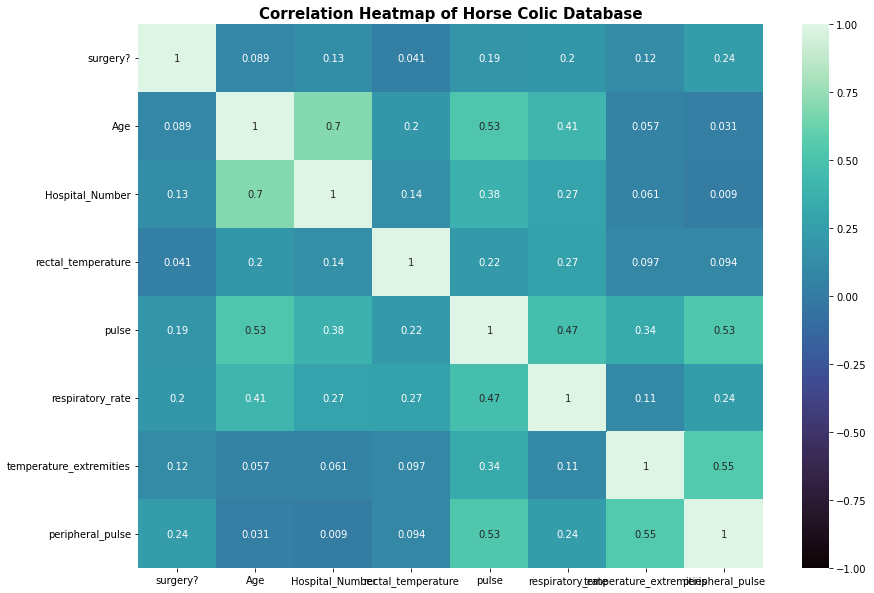

In [31]:
plt.figure(figsize=(14,10))
plot = sns.heatmap(abs(df1.corr()), annot=True, cmap='mako',vmin=-1)
plt.title('Correlation Heatmap of Horse Colic Database', weight='bold',fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

Выводы:
1) Сформированная таблица имеет 8 столбцов и 300 строк. 
Количественные типы данных (всего 3 столбца): 1) rectal_temperature (непрерывные значения); 2) pulse (дискретные значения); 3) respiratory_rate (дискретные значения) Качественные типы данных: 1) surgery? (ранжирование значимо); 2) Age (ранжирование значимо); 3) Hospital_Number (ранжирование незначимо); 4) temperature_extremities (ранжирование значимо); 5) peripheral_pulse (ранжирование значимо)

2) Параметры 'Age' и 'Hospital number' не имеют пропусков значений, остальные параметры содержат пропуски. Параметр peripheral_pulse содержит больше всего пропусков (69 из 300 значений пропущено).

3) Из 289 значений параметр surgery? имеют положительный ответ 180 значений - Yes, it had surgery (да, были прооперированы).

4) Из данных 'Age' следует, что подавляющее большинство лошадей старше 6 месяцев (276 - Adult).

5) В 16 случаях лошади проходили повторное лечение (параметр Hospital_Number).

6) Согласно значениям параметра 'rectal temperature' в 25% случаев лошади имели температуру ниже либо равной нормальному значмению 37.8 градусов C. В половине случаев температура лошадей превышала 38.2 градуса Цельсия, возможно, по причине инфекции.
Вид гистограммы распределения данного параметра очень близок к нормальному закону.

7) Меньше 25% исследуемых лошадей имели нормальный пульс (параметр pulse)30-40. Больше половины случаев имели значения более 64 (значение медианы), что свидетельствует о наличии заболевания у лошадей. 
Гистограмма распределения данного параметра смещен влево в сторону низких значений.

8)Более 75% лошадей имели проблему с частотой дыхания (параметр respiratory rate превышал значение допустимое значение 8-10).
Гистограмма распределения этого параметра сильно смещена влево в сторону низких значений.

9) Параметр temperature_extremeties только в 78 случаях имел нормальное значение. В остальных случаях он имел значение cool или cold (признак наличия шока) или warm (30 случаев, признак повышенной температуры temperature_extremities, а значит инфекции).

10) В 120 случаях параметр peripheral_pulse имел нормальное или повышенное значение, в остальных зарегистрированных случаях это значение было низким или отсутствовало, что означает проблемы с циркуляцией крови.

11) Корреляционная матрица указывает на наличие положительной связи между surgery? и параметрами pulse, respiratory_rate и peripheral_pulse, таким образом вероятность операции возрастает с ростом значений характеристик пульса и частоты дыхания.

#2) Работа с пропусками

In [32]:
# Для повышения объективности данных оставляем только те строки, которые содержат 6 из 8 заполненных значений.
# В результате остается 276 строк из 300
df2 = df1.dropna(thresh = 6)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery?                 275 non-null    float64
 1   Age                      276 non-null    int64  
 2   Hospital_Number          276 non-null    int64  
 3   rectal_temperature       238 non-null    float64
 4   pulse                    267 non-null    float64
 5   respiratory_rate         238 non-null    float64
 6   temperature_extremities  236 non-null    float64
 7   peripheral_pulse         224 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.4 KB


In [33]:
# Пропущено 36 значений. По мнению экспертов, в данном случае пропуски абсолютно случайны и отсутствие данных имеет естественную причину.
# Поскольку это количественная величина, а вид распределения близок к нормальному, 
 # то заменяем пропущенные значения среднеарифметическим значением.  
df2['rectal_temperature']=df2['rectal_temperature'].fillna(df2['rectal_temperature'].mean())
print(df1['rectal_temperature'].describe())
print('-----------------------------')
print(df2['rectal_temperature'].describe())

count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal_temperature, dtype: float64
-----------------------------
count    276.000000
mean      38.168908
std        0.681949
min       35.400000
25%       37.800000
50%       38.168908
75%       38.500000
max       40.800000
Name: rectal_temperature, dtype: float64


<ipython-input-33-d3c34e95b570>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rectal_temperature']=df2['rectal_temperature'].fillna(df2['rectal_temperature'].mean())


In [34]:
#Осутствует 34 значения в столбце respiratory rate. Предположительно причиной отсутствия значений послужили технические ошибки. 
#Значения данного количественного параметра имеют большой размах и высокое среднеквадратическое отклонение.
# Для того, чтобы сохранить данные, заменяем пропущенные значения медианой. 
# Поскольку между параметрами 'Age' и 'respiratory_rate' имеется положительная корреляционная связь,
#при расчете медианы производим группировку по параметру Age.
df2['respiratory_rate'] = df2['respiratory_rate'].fillna(df2.groupby('Age')['respiratory_rate'].transform('median'))
print(df1['respiratory_rate'].describe())
print('-----------------------------')
print(df2['respiratory_rate'].describe())

count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory_rate, dtype: float64
-----------------------------
count    276.000000
mean      29.829710
std       16.683034
min        8.000000
25%       20.000000
50%       24.000000
75%       36.000000
max       96.000000
Name: respiratory_rate, dtype: float64


<ipython-input-34-c59472760daa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['respiratory_rate'] = df2['respiratory_rate'].fillna(df2.groupby('Age')['respiratory_rate'].transform('median'))


In [35]:
#Данный параметр относится к качественному типу данных.
# Для того, чтобы сохранить данные, заменяем пропущенное значение модой.
df2['surgery?']=df2['surgery?'].fillna(df2['surgery?'].mode()[0])
df2['surgery?'].value_counts()


<ipython-input-35-63c6efd41b2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['surgery?']=df2['surgery?'].fillna(df2['surgery?'].mode()[0])


1.0    164
2.0    112
Name: surgery?, dtype: int64

In [36]:
#Данный параметр относится к качественному типу данных.
# Для того, чтобы сохранить данные, заменяем пропущенное значение модой.
df2['temperature_extremities']=df2['temperature_extremities'].fillna(df2['temperature_extremities'].mode()[0])
df2['temperature_extremities'].value_counts()

<ipython-input-36-f536b9974c62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['temperature_extremities']=df2['temperature_extremities'].fillna(df2['temperature_extremities'].mode()[0])


3.0    143
1.0     77
2.0     29
4.0     27
Name: temperature_extremities, dtype: int64

In [37]:
#Данный параметр относится к качественному типу данных.
# Для того, чтобы сохранить данные, заменяем пропущенное значение модой.
df2['peripheral_pulse']=df2['peripheral_pulse'].fillna(df2['peripheral_pulse'].mode()[0])
df2['peripheral_pulse'].value_counts()

<ipython-input-37-547174c170a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['peripheral_pulse']=df2['peripheral_pulse'].fillna(df2['peripheral_pulse'].mode()[0])


1.0    165
3.0     99
4.0      7
2.0      5
Name: peripheral_pulse, dtype: int64

In [38]:
df2.head(10)

,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_extremities,peripheral_pulse
0,2.0,1,530101,38.500000,66.0,28.0,3.0,3.0
1,1.0,1,534817,39.200000,88.0,20.0,3.0,1.0
2,2.0,1,530334,38.300000,40.0,24.0,1.0,1.0
3,1.0,9,5290409,39.100000,164.0,84.0,4.0,1.0
4,2.0,1,530255,37.300000,104.0,35.0,3.0,1.0
6,1.0,1,526802,37.900000,48.0,16.0,1.0,1.0
8,2.0,1,530051,38.168908,80.0,36.0,3.0,4.0
9,2.0,9,5299629,38.300000,90.0,49.0,1.0,1.0
10,1.0,1,528548,38.100000,66.0,12.0,3.0,3.0
11,2.0,1,527927,39.100000,72.0,52.0,2.0,1.0


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery?                 276 non-null    float64
 1   Age                      276 non-null    int64  
 2   Hospital_Number          276 non-null    int64  
 3   rectal_temperature       276 non-null    float64
 4   pulse                    267 non-null    float64
 5   respiratory_rate         276 non-null    float64
 6   temperature_extremities  276 non-null    float64
 7   peripheral_pulse         276 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.4 KB


In [40]:
df2.describe()

,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_extremities,peripheral_pulse
count,276.000000,276.000000,2.760000e+02,276.000000,267.000000,276.000000,276.000000,276.000000
mean,1.405797,1.637681,1.065319e+06,38.168908,72.097378,29.829710,2.434783,1.811594
std,0.491938,2.170687,1.504801e+06,0.681949,28.918960,16.683034,1.001501,1.013012
min,1.000000,1.000000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,1.000000
25%,1.000000,1.000000,5.289558e+05,37.800000,48.000000,20.000000,1.000000,1.000000
50%,1.000000,1.000000,5.303570e+05,38.168908,64.000000,24.000000,3.000000,1.000000
75%,2.000000,1.000000,5.347538e+05,38.500000,88.000000,36.000000,3.000000,3.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000


# 3) Работа с выбросами

In [41]:
# Предположительно, основной причиной появления выбросов параметра pulse, является ошибки ввода данных.
# Для того, чтобы исключить влияние ошибок на результаты исследования, удаляем строки, содержащие эти данные.
pulse_minimum = df2['pulse'].quantile(0.25) - 1.5*pulse_IQR
print(pulse_minimum)
pulse_maximum = df2['pulse'].quantile(0.75) + 1.5*pulse_IQR
print(pulse_maximum)
remove_outliers = df2[df2['pulse'].between(pulse_minimum, pulse_maximum, inclusive = True)]
remove_outliers.head(10)

-12.0
148.0


<ipython-input-41-24f0726227b4>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  remove_outliers = df2[df2['pulse'].between(pulse_minimum, pulse_maximum, inclusive = True)]


,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_extremities,peripheral_pulse
0,2.0,1,530101,38.500000,66.0,28.0,3.0,3.0
1,1.0,1,534817,39.200000,88.0,20.0,3.0,1.0
2,2.0,1,530334,38.300000,40.0,24.0,1.0,1.0
4,2.0,1,530255,37.300000,104.0,35.0,3.0,1.0
6,1.0,1,526802,37.900000,48.0,16.0,1.0,1.0
8,2.0,1,530051,38.168908,80.0,36.0,3.0,4.0
9,2.0,9,5299629,38.300000,90.0,49.0,1.0,1.0
10,1.0,1,528548,38.100000,66.0,12.0,3.0,3.0
11,2.0,1,527927,39.100000,72.0,52.0,2.0,1.0
12,1.0,1,528031,37.200000,42.0,12.0,2.0,1.0


In [42]:
# Предположительно, основной причиной появления выбросов параметра pulse, является технический сбой измерительного оборудования.
# Для того, чтобы исключить влияние ошибок на результаты исследования, удаляем строки, содержащие данные, полученные с неисправным оборудованием.
rectal_temp_minimum = df2['rectal_temperature'].quantile(0.25) - 1.5*rectal_temperature_IQR
print(rectal_temp_minimum)
rectal_temp_maximum = df2['rectal_temperature'].quantile(0.75) + 1.5*rectal_temperature_IQR
print(rectal_temp_maximum)
remove_outliers = df2[df2['rectal_temperature'].between(rectal_temp_minimum, rectal_temp_maximum, inclusive = True)]
remove_outliers.head(10)



36.74999999999999
39.550000000000004


<ipython-input-42-4d9388c6cc62>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  remove_outliers = df2[df2['rectal_temperature'].between(rectal_temp_minimum, rectal_temp_maximum, inclusive = True)]


,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_extremities,peripheral_pulse
0,2.0,1,530101,38.500000,66.0,28.0,3.0,3.0
1,1.0,1,534817,39.200000,88.0,20.0,3.0,1.0
2,2.0,1,530334,38.300000,40.0,24.0,1.0,1.0
3,1.0,9,5290409,39.100000,164.0,84.0,4.0,1.0
4,2.0,1,530255,37.300000,104.0,35.0,3.0,1.0
6,1.0,1,526802,37.900000,48.0,16.0,1.0,1.0
8,2.0,1,530051,38.168908,80.0,36.0,3.0,4.0
9,2.0,9,5299629,38.300000,90.0,49.0,1.0,1.0
10,1.0,1,528548,38.100000,66.0,12.0,3.0,3.0
11,2.0,1,527927,39.100000,72.0,52.0,2.0,1.0


In [43]:
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery?                 262 non-null    float64
 1   Age                      262 non-null    int64  
 2   Hospital_Number          262 non-null    int64  
 3   rectal_temperature       262 non-null    float64
 4   pulse                    253 non-null    float64
 5   respiratory_rate         262 non-null    float64
 6   temperature_extremities  262 non-null    float64
 7   peripheral_pulse         262 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.4 KB


In [44]:
df2[~df2['pulse'].between(pulse_minimum, pulse_maximum, inclusive = True)]

<ipython-input-44-c2e5acb86ad6>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df2[~df2['pulse'].between(pulse_minimum, pulse_maximum, inclusive = True)]


,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_extremities,peripheral_pulse
3,1.0,9,5290409,39.100000,164.0,84.0,4.0,1.0
41,2.0,9,5288249,39.000000,150.0,72.0,3.0,1.0
55,1.0,9,5282839,38.600000,160.0,20.0,3.0,1.0
58,1.0,1,528298,38.168908,NaN,20.0,4.0,3.0
83,1.0,1,5279822,38.000000,NaN,24.0,3.0,3.0
115,2.0,1,533723,38.168908,NaN,40.0,3.0,1.0
117,2.0,1,5290482,39.500000,NaN,24.0,3.0,3.0
126,1.0,1,530384,38.700000,NaN,24.0,3.0,1.0
151,1.0,1,529399,39.300000,NaN,24.0,4.0,3.0
159,2.0,1,528134,38.168908,NaN,12.0,1.0,1.0


In [45]:
# Основная причина появления выбросов значений параметра respiratory_rate - ошибка обработки данных. 
respiratory_rate_minimum = df2['respiratory_rate'].quantile(0.25) - 1.5*respiratory_rate_IQR
print(respiratory_rate_minimum)
respiratory_rate_maximum = df2['respiratory_rate'].quantile(0.75) + 1.5*respiratory_rate_IQR
print(respiratory_rate_maximum)
#remove_outliers = df2[df2['respiratory_rate'].between(respiratory_rate_minimum, respiratory_rate_maximum, inclusive = True)]
#remove_outliers.head(10)

-6.25
62.25


In [46]:
# заменяем значения выбросов на respiratory_rate_maximum и respiratory_rate_minimum, полученные с использованием IQR
remove_outliers['respiratory_rate'] = np.where(remove_outliers['respiratory_rate']> respiratory_rate_maximum, respiratory_rate_maximum,
                                         np.where(remove_outliers['respiratory_rate']< respiratory_rate_minimum, respiratory_rate_minimum, remove_outliers['respiratory_rate']))
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surgery?                 262 non-null    float64
 1   Age                      262 non-null    int64  
 2   Hospital_Number          262 non-null    int64  
 3   rectal_temperature       262 non-null    float64
 4   pulse                    253 non-null    float64
 5   respiratory_rate         262 non-null    float64
 6   temperature_extremities  262 non-null    float64
 7   peripheral_pulse         262 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.4 KB


<ipython-input-46-787fcab8d02f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_outliers['respiratory_rate'] = np.where(remove_outliers['respiratory_rate']> respiratory_rate_maximum, respiratory_rate_maximum,


In [47]:
# Определим столбцы с числовыми типами данных
cont_col = remove_outliers.drop(['surgery?', 'Age', 'Hospital_Number',  'temperature_extremities', 'peripheral_pulse'], axis = 1)
cont_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 299
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rectal_temperature  262 non-null    float64
 1   pulse               253 non-null    float64
 2   respiratory_rate    262 non-null    float64
dtypes: float64(3)
memory usage: 8.2 KB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

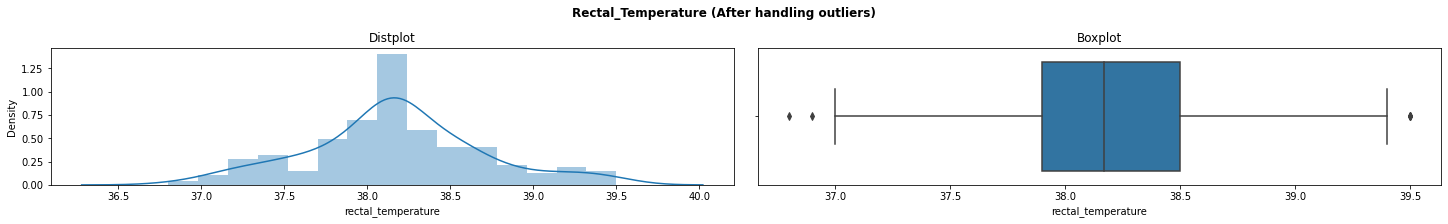

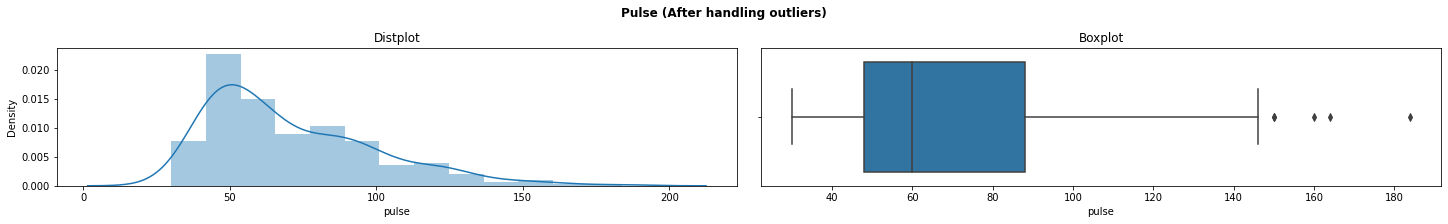

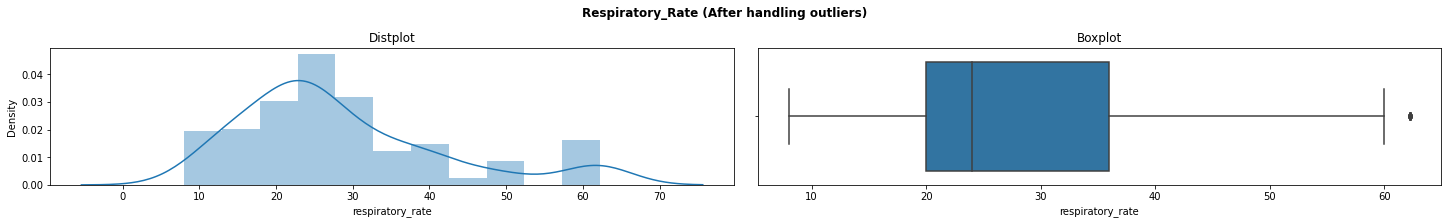

In [48]:
#Построим графическую визуализацию распределений числовых данных (гистограммы и боксплоты) 
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(cont_col[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(cont_col[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

#Выводы
В результате работы с пропусками и выбросами, была сформирована таблица, содержащая 8 столбцов и 262 строки. 

Приведенные гистрограммы и боксплоты показывают улучшение качества отобранных значений количественных параметров. 

## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.